In [1]:
from masspred_system import two_planet_system, np, plt
import radvalley_definitions as rvdef
%matplotlib inline

In [2]:
# define Kepler-36 planetary system
kep36 = 1
if kep36:
    N = 1000
    Xiron_samp = np.random.normal(1/3,.05,N)
    Xiron_samp = Xiron_samp[Xiron_samp>=0]

    tps = two_planet_system(rvdef.define_radval_simple, N, label='Kep36')
    tps.add_star(np.random.normal(1.071,.043,N), np.random.normal(1.626,.019,N), np.random.normal(5911,66,N))
    tps.add_planet(13.83989, np.random.normal(1.486,.035,N), np.random.normal(4.45,.3,N), Xiron_samp)
    tps.add_planet(16.23855, np.random.normal(3.679,.054,N), np.random.normal(8.08,.55,N), Xiron_samp)
    #tps.add_star(1.071, 1.626, 5911)
    #tps.add_planet(13.83989, 1.486, 4.45, 1/3)
    #tps.add_planet(16.23855, 3.679, 8.08, 1/3)

In [3]:
# define LTT 3780 planetary system
ltt3780 = 0
if ltt3780:
    N = 100
    Xiron_samp = np.random.normal(1/3,.05,N)

    tps = two_planet_system(rvdef.define_radval_lowmassstar, N, label='LTT3780')
    tps.add_star(np.random.normal(.401,.012,N), np.random.normal(.374,.011,N), np.random.normal(3331,157,N))
    tps.add_planet(.77, np.random.normal(1.33,.075,N), np.random.normal(3.12,.5,N), Xiron_samp, radval_args=[.77])
    tps.add_planet(12.25, np.random.normal(2.3,.16,N), np.random.normal(8.5,1.65,N), Xiron_samp, radval_args=[12.25])

## test photoevaporation scenario

In [4]:
tps.compute_Mgas_min_photoevaporation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under photoevaporation (100 realizations)



/Users/ryancloutier/anaconda3/envs/myenv/lib/python3.8/site-packages/scipy/optimize/minpack.py:162: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:81: RuntimeWarning: divide by zero encountered in log10
  DR_solution = 10**float(fsolve(_solve_Rrcb, np.log10(DR_guess), args=args))
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
  I2_I1 = I2/I1
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  rhorcb *= (3*kappa0 * Mearth2g(Mcore)*Xenv)**(-a)


Time elapsed = 421.2 seconds (7.02 minutes).



/Users/ryancloutier/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [5]:
tps.photoevaporation.report_results()

Gaseous planet measured mass = 8.040 + 0.560 - 0.505 Earth masses
Gaseous planet minimum mass = 5.331 + 0.332 - 0.356 Earth masses
Photoevaporation consistency rate = 1.000
Planet model success rate = 1.000


In [6]:
tps.plot_Mmin_histograms(outfile='kep36.png', binwidth=.2)
#handles, labels, s = plot_Mmin_histograms_width(tps, outfile='tmp.png', binwidth=.2)

AttributeError: 'two_planet_system' object has no attribute 'plot_Mmin_histograms_width'

In [10]:
tps.photoevaporation.DONE

True

## test core-powered mass loss scenario

In [7]:
tps.compute_Mgas_min_corepoweredmassloss(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under core-powered mass loss (100 realizations)



/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:81: RuntimeWarning: divide by zero encountered in log10
  DR_solution = 10**float(fsolve(_solve_Rrcb, np.log10(DR_guess), args=args))
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
  I2_I1 = I2/I1
/Users/ryancloutier/Research/RadValMassPred/planetary_structure.py:62: RuntimeWarning: divide by zero encountered in double_scalars
  rhorcb *= (3*kappa0 * Mearth2g(Mcore)*Xenv)**(-a)


Time elapsed = 1377.8 seconds (22.96 minutes).



/Users/ryancloutier/anaconda3/envs/myenv/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1370: RuntimeWarning: All-NaN slice encountered
  r, k = function_base._ureduce(


In [10]:
tps.corepoweredmassloss.report_results()

Gaseous planet measured mass = 8.039 + 0.535 - 0.578 Earth masses
Gaseous planet minimum mass = 7.533 + 0.552 - 0.700 Earth masses
Core-powered mass loss consistency rate = 0.790
Planet model success rate = 1.000


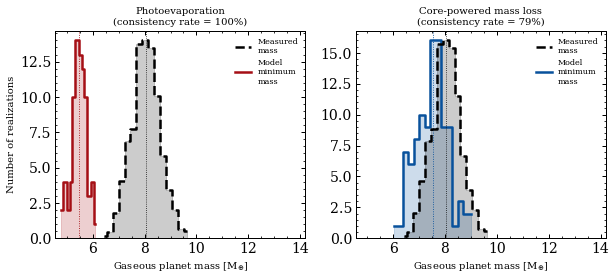

In [11]:
tps.plot_Mmin_histograms(outfile='tmp2.png')

## test gas-poor formation scenario

In [13]:
tps.compute_Mgas_min_gaspoorformation(value_errors=False, size=100)


Computing the gaseous planet's minimum mass under gas-poor formation (100 realizations)



Time elapsed = 6.2 seconds (0.10 minutes).


In [14]:
tps.gaspoorformation.report_results()

Gaseous planet measured mass = 8.039 + 0.535 - 0.578 Earth masses
Gaseous planet minimum mass = 4.754 + 0.295 - 0.298 Earth masses
Gas-poor formation consistency rate = 1.000
Planet model success rate = 1.000


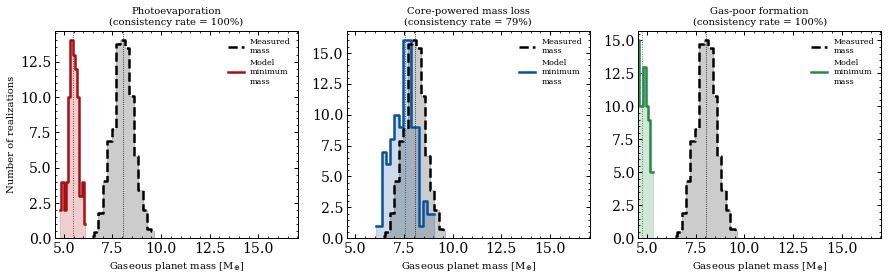

In [16]:
tps.plot_Mmin_histograms(outfile='tmp3.png')